<b style="color:Green;font-size:32px;">Sparks Foundation - Data Science & Analytics Internship!</b><br>
<b style="color:#ff3333;font-size:19px;">#Task_3 - Prediction using Decision Tree Classifier for IRIS Dataset!</b><br>
<b style="font-size:17px;">Description of the task_3:-</b><br>
<ul style="font-size:15px;line-height:18px;"><b><li>For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.<br>
<li>The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. k</li></b>
 <a>https://github.com/UMMEATHIYA/Student-Percentage-Prediction_Sparks-Foundations</a></li></b>
</ul>

<b style="color:DarkGreen;font-size:20px;">Importing the Libraries!</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

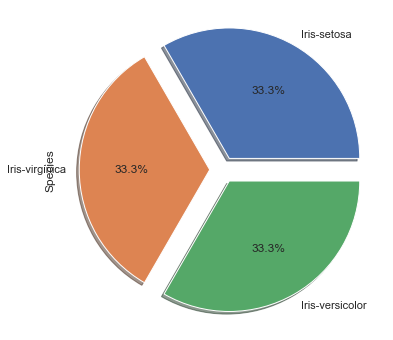

In [70]:
df['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(8,6))

<b style="color:DarkGreen;font-size:20px;">Boxen Plots</b><br>
The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.



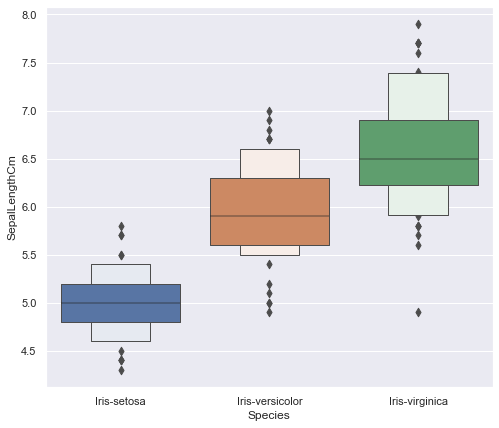

In [73]:
fig=plt.gcf()
fig.set_size_inches(8,7)
fig=sns.boxenplot(x='Species',y='SepalLengthCm',data=df)

<b style="color:DarkGreen;font-size:20px;">Venn Diagram Plots</b><br>
<li>A Venn diagram (also called primary diagram, set diagram or logic diagram) is a diagram that shows all possible logical relations between a finite collection of different sets. Each set is represented by a circle. </li>
<li>The circle size represents the importance of the group. The groups are usually overlapping: the size of the overlap represents the intersection between both groups.</li>
<li>It is unadvised to make Venn diagram with more than 3 groups because it would become hard to read. In python, Venn diagram are realised using the venn2 and venn3 function of the matplotlib library according to the number of group you have. See here for module installation.</li>



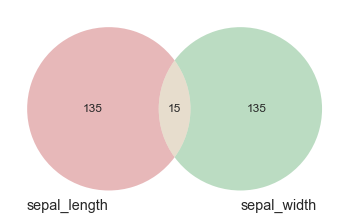

In [75]:
from matplotlib_venn import venn2
sepal_length = df.iloc[:,0]
sepal_width = df.iloc[:,1]
petal_length = df.iloc[:,2]
petal_width = df.iloc[:,3]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()

<b style="color:DarkGreen;font-size:20px;">Histogram Plots</b><br>
A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

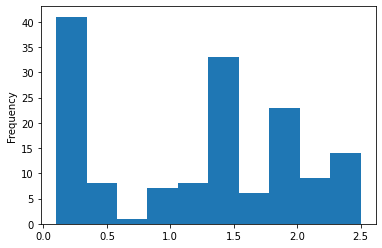

In [8]:
df['PetalWidthCm'].plot.hist()
plt.show()

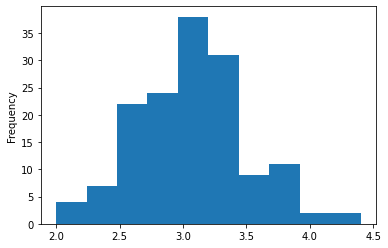

In [60]:
df['SepalWidthCm'].plot.hist()
plt.show()

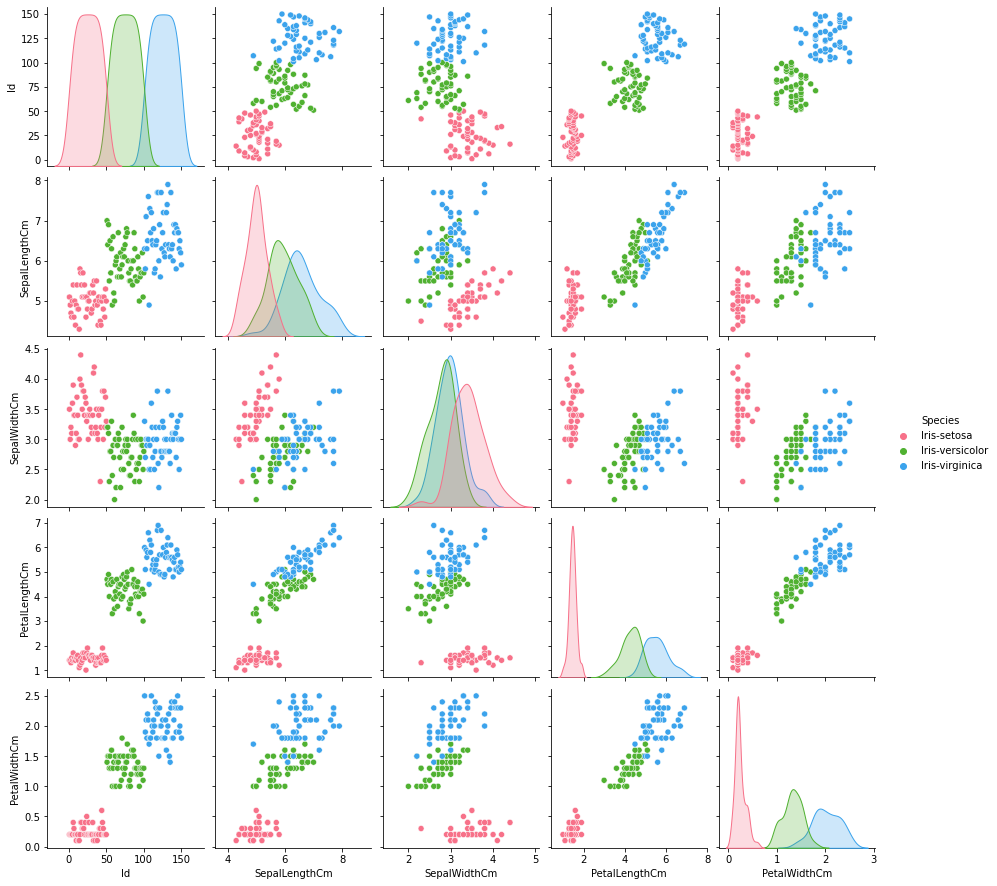

In [58]:
sns.pairplot(df, hue='Species',palette="husl")

<b style="color:DarkGreen;font-size:20px;">Box Plots</b><br>
In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001E6ADF60>,
      dtype=object)

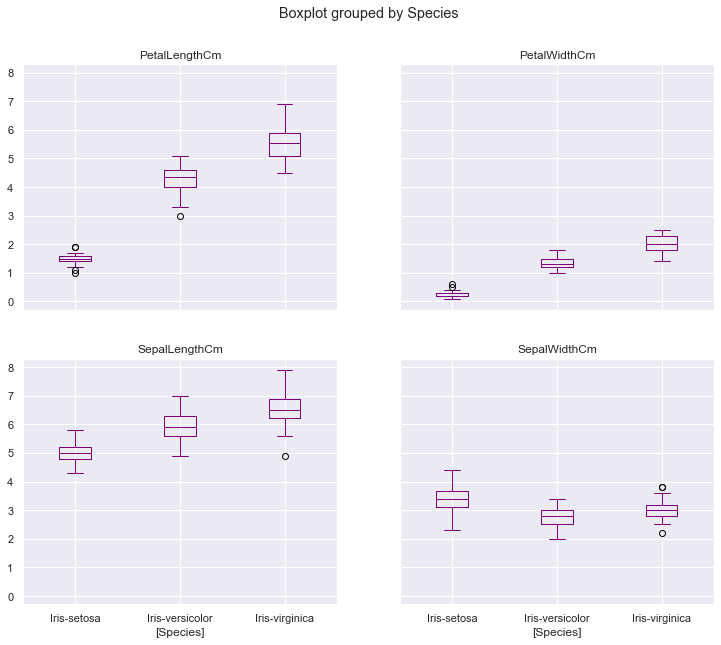

In [78]:
df.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 10),color="purple")

<b style="color:DarkGreen;font-size:20px;">Model Training & Evaluation - Decision Tree</b><br>


In [16]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
Y = df['Species'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=10)


In [18]:
declf = DecisionTreeClassifier()
declf.fit(train_inputs, train_classes)

DecisionTreeClassifier()

In [48]:
predictions = declf.predict(test_inputs)

<b style="color:DarkGreen;font-size:20px;">Adding new values to the dataset to check for results matching - Accuracy</b><br>


In [53]:
new_inputs = [[5.1, 3.5,1.4,0.2]]
predictions = declf.predict(new_inputs)
predictions

array(['Iris-setosa'], dtype=object)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print("confusion_matrix :-\n",confusion_matrix(test_classes,predictions))

print("\nclassification_report :- \n",classification_report(test_classes,predictions))

confusion_matrix :-
 [[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]

classification_report :- 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [22]:
declf.score(test_inputs, test_classes)

0.9777777777777777

 <b style="color:DarkGreen;font-size:20px;">Printing the Text Representations</b><br>
Exporting Decision Tree to the text representation can be useful when working on applications without user interface or when we want to log information about the model into the text file.

In [27]:
from sklearn import tree
text_representation = tree.export_text(declf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.60
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.60
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



<b style="color:DarkGreen;font-size:20px;">Saving the Text Representations into a file</b><br>


In [31]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
print("Successfully saved the file with the name decistion_tree.log! Check your directory!")

Successfully saved the file with the name decistion_tree.log! Check your directory!


<b style="color:DarkGreen;font-size:20px;">Plotting Tree with plot_tree method</b><br>
The plot_tree method was added to sklearn in version 0.21. It requires matplotlib to be installed. It allows us to easily produce figure of the tree (without intermediate exporting to graphviz) 

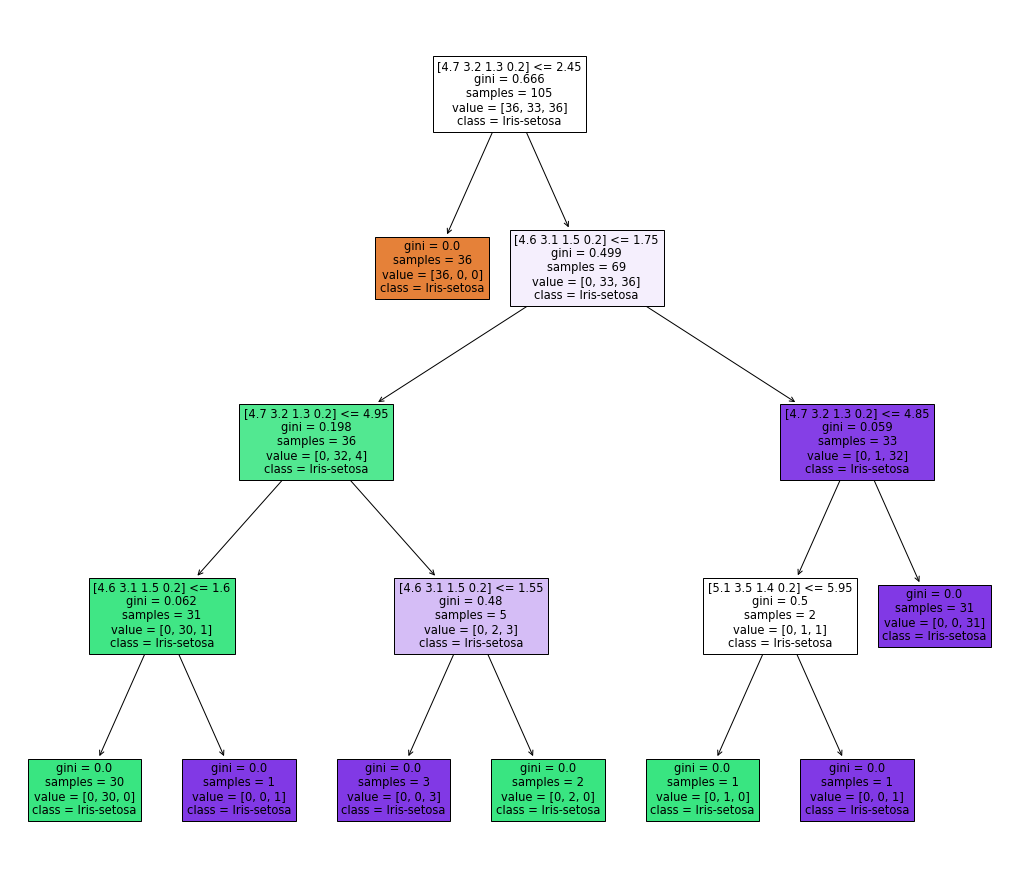

In [38]:
fig = plt.figure(figsize=(18,16))
t1 = tree.plot_tree(declf, 
                   feature_names=X,  
                   class_names=Y,
                   filled=True)

<b style="color:DarkGreen;font-size:20px;">Saving the Tree Plot on System!</b><br>

In [39]:
fig.savefig("decistion_tree.png")

<b style="color:DarkGreen;font-size:20px;">Facet Grid</b><br>
<li>The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.</li><br><li> A FacetGrid can be drawn with up to three dimensions: row, col, and hue.</li><br> <li>The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.</li><br> 

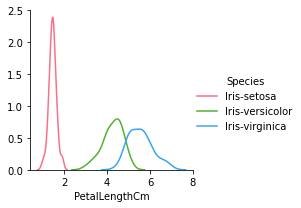

In [55]:
sns.FacetGrid(df, hue="Species", palette="husl").map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

In [77]:
new_inputs = [[6,2.1,3.9,1.2]]
predictions = declf.predict(new_inputs)
predictions

array(['Iris-versicolor'], dtype=object)